# <center>L2 Computational Physics</center>
---

## Week 5: Monte Carlo Methods

In this notebook, you will simulate a system with of three nuclei $A$, $B$ and $C$ where $A$ decays into $B$ and $B$ decays into $C$. If exposed to a neutron flux nucleus $C$ can be activated into a nucleus $A$. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import random

Implement a function that tells whether a transition has occured, based on the transition probability and a random number. Use the random number `r` from `random.random()` and use the procedure described in the notes so that the checks can work in a reproducible way.

In [2]:
def has_transitioned(prob):
    r = random.random()
    # YOUR CODE HERE
    if r <= prob:
        return True
    else:
        return False

In [3]:
# this test is worth 1 mark
random.seed(9867)
assert [ has_transitioned(0.5) for i in range(10)] == [False, False, True, False, False, False, False, True, False, True]

We are going to keep track of the state of the atoms using a either `'A'`, `'B'` or `'C'` for each nucleus. For example 
```python
state = ['A', 'A', 'B', 'A', 'C']
```

We will capture the possible physical reaction in a list of allowed transitions such as

`('A', 'B', 0.25 )`

where the first element is the initial state, the second element is the final state of the transition and its probability in the time interval considered is the third argument.

Define a function that takes as arguments the current state and a list of such transition rules and implements the transition (or not) and returns the new state

In [25]:

def evolveOne(currentState, rules):
    # YOUR CODE HERE
    for i in range(0, len(rules)):
        if currentState == rules[i][0]:
            r = random.random()
            if r <= rules[i][2]:
                return rules[i][1]
            else:
                return currentState
        if currentState != rules[len(rules)-1][0]:
            return currentState
        

In [26]:
evolveOne('A', testRules)

'A'

In [27]:
# these tests are worth 1 mark
alwaysDecayRules = [
    ('A', 'B', 1.0),
    ('B', 'C', 1.0)
]
assert evolveOne('A', alwaysDecayRules) == 'B'
assert evolveOne('B', alwaysDecayRules) == 'C'

In [28]:
# these tests are worth 2 mark
random.seed(112211)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'B'

assert evolveOne('B', testRules) == 'B'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'

# with no rules there should be no change
assert evolveOne('C', testRules) == 'C'


Now implement a function that takes a list of states and transition them according to the rules passed as argument. This function should return a new vector of states, it should not modify the state passed as an argument!

In [61]:
def evolveMany(states, rules):
    newState = []
    # YOUR CODE HERE
    for i in range(0, len(states)):
        newState.append(evolveOne(states[i], rules)
    print(newState)
    return newState


In [62]:
# these tests are worth 1 mark
random.seed(112287)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
initialTestArray = ['A','B','C']*5
evolvedTest = evolveMany(initialTestArray, testRules)
targetArray = ['B', 'C', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'C', 'C'] 
assert evolvedTest == targetArray
# checks the initial array is left unchanged
assert initialTestArray == ['A','B','C']*5

Define a function that evolves a system that starts with initial amounts `NA`, `NB` and `NC` of $A$, $B$ and $C$ nuclei and evolved it in `n_timestep` from time $t=0$ to $t=t_{max}$. The function should return three arrays, one for each atom type, of the number of nuclei of that type at each time step. Each array should contain `n_timestep+1` elements including the initial amount. 
 

In [87]:
def evolve_system(NA, NB, NC, rules, n_step):
    state = (['A']*NA)+(['B']*NB)+(['C']*NC)
    
    A_count = [NA]
    B_count = [NB]
    C_count = [NC]
    
    evolve = state
    test = ['A', 'B', 'C']
    for i in range(0, n_step):
        evolve = evolveMany(evolve, rules)
        no_A= evolve.count('A')
        no_B = evolve.count('B')
        no_C = evolve.count('C')
        A_count.append(no_A)
        B_count.append(no_B)
        C_count.append(no_C)
    
    print(numpy.array(A_count), numpy.array(B_count), numpy.array(C_count))
    return numpy.array(A_count), numpy.array(B_count), numpy.array(C_count)

In [88]:
# these tests are worth 2 marks
rules = [
    ('A', 'B', 0.0033),
    ('B', 'C', 0.0075),
    ('C', 'A', 0.009)
    
]

r1, r2, r3 = evolve_system(0,0,250, rules, 17)
assert len(r1) == 18
assert len(r2) == 18
assert len(r3) == 18

[ 0  3  4  5  6  7  9 12 13 17 19 20 22 23 23 25 29 29] [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1] [250 247 246 245 244 243 241 238 237 233 231 229 227 226 226 224 220 220]


In [89]:
# these tests are worth 2 marks 
testrules = [
    ('A', 'B', 0.086),
    ('B', 'C', 0.075),
    ('C', 'A', 0.19)
    
]

random.seed(9485)
r1, r2, r3 = evolve_system(200,200,200, testrules, 20)
assert (r1 == [200, 213, 233, 250, 258, 251, 266, 263, 259, 260, 265, 259, 256,
        255, 258, 256, 259, 253, 249, 247, 253]).all()
assert (r2 == [200, 198, 201, 206, 205, 214, 214, 212, 216, 221, 225, 234, 236,
        238, 234, 235, 231, 245, 253, 256, 252]).all()
assert (r3 == [200, 189, 166, 144, 137, 135, 120, 125, 125, 119, 110, 107, 108,
        107, 108, 109, 110, 102,  98,  97,  95]).all()

[200 225 244 253 240 238 230 222 209 200 181 180 171 153 140 126 120 114
 104  98  91] [200 217 232 253 280 299 322 340 359 373 397 406 417 435 450 464 472 480
 490 496 505] [200 158 124  94  80  63  48  38  32  27  22  14  12  12  10  10   8   6
   6   6   4]


AssertionError: 

## Plotting tasks

Create a plot with the number of $A$, $B$ and $C$ nuclei, starting with 250 $C$ nuclei and evolving the system for 100 hours using 200 steps and with neutron flux on. Evolve the system for another 100 hours (using 200 steps) without neutron flux (i.e. no transitions from $C$ to $A$).  

The half life of the $A$ atoms is 10.1 hours, the half life of $B$ nuclei is 15.7 hours and we can caracterise the rate of activation of $C$ into $A$ when the neutron flux is on with and effective half-life of 3.2 hours.

The plot should have the appropriate labels and legend. [8 marks]    




[ 0  8 21] [0 0 0] [250 242 229]
[ 0  7 20] [0 0 0] [250 243 230]
[ 0 14 19] [0 0 0] [250 236 231]
[ 0 14 22] [0 0 0] [250 236 228]
[ 0 16 24] [0 0 0] [250 234 226]
[ 0  9 18] [0 0 0] [250 241 232]
[ 0  7 13] [0 0 0] [250 243 237]
[ 0 12 21] [0 0 0] [250 238 229]
[ 0  8 18] [0 0 0] [250 242 232]
[ 0  8 17] [0 0 0] [250 242 233]
[ 0 12 22] [0 0 0] [250 238 228]
[ 0 11 19] [0 0 0] [250 239 231]
[ 0  8 17] [0 0 0] [250 242 233]
[ 0  7 14] [0 0 0] [250 243 236]
[ 0 11 17] [0 0 0] [250 239 233]
[ 0  9 18] [0 0 0] [250 241 232]
[ 0 13 15] [0 0 0] [250 237 235]
[ 0  7 21] [0 0 0] [250 243 229]
[ 0  7 17] [0 0 0] [250 243 233]
[ 0 12 20] [0 0 0] [250 238 230]
[ 0 11 22] [0 0 0] [250 239 228]
[ 0 12 16] [0 0 0] [250 238 234]
[ 0  8 19] [0 0 0] [250 242 231]
[ 0  5 11] [0 0 0] [250 245 239]
[ 0  6 13] [0 0 0] [250 244 237]
[ 0 12 23] [0 0 0] [250 238 227]
[ 0  6 19] [0 0 0] [250 244 231]
[ 0  7 13] [0 0 0] [250 243 237]
[ 0 10 14] [0 0 0] [250 240 236]
[ 0 10 11] [0 0 0] [250 240 239]
[ 0  5 13]

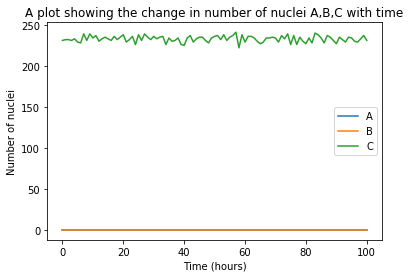

In [106]:
nsteps = 200
t_total = 100
t_half_A = 10.1
t_half_B = 15.7
t_half_C = 3.2
a_nuclei = []
b_nuclei = []
c_nuclei = []
time = []
decay_constant_a = numpy.log(2)/t_half_A
decay_constant_b = numpy.log(2)/t_half_B
decay_constant_c = numpy.log(2)/t_half_C
rules = [['C', 'A', decay_constant_a/2], ['C', 'B', decay_constant_c/2], ['B', 'A', decay_constant_b/2]]
for i in range(0, t_total+1):
    a_nuclei.append(evolve_system(0,0,250, rules ,2)[0][0])
    b_nuclei.append(evolve_system(0,0,250, rules ,2)[1][1])
    c_nuclei.append(evolve_system(0,0,250, rules ,2)[2][2])
    time.append(i)
    
print(c_nuclei)

plt.plot(time, a_nuclei, label = 'A')
plt.plot(time, b_nuclei, label = 'B')
plt.plot(time, c_nuclei, label = 'C')
plt.xlabel('Time (hours)')
plt.ylabel('Number of nuclei')
plt.title('A plot showing the change in number of nuclei A,B,C with time')
plt.legend()

#need separate arrays for each nuclei, all plot on same graph, need labels, titles, legend etc.

Run the above simulation 20 times with 200 steps and use the results to calculate an average and the uncertainty on the number of $A$ atoms as a function of time. Use and `errorbar` plot for it. You might be interested in the `numpy.average` and `numpy.std` functions. The plot should have axis labels and a title.  [3 marks]


In [102]:
nsim = 20

def repeatEvolve(nsim):  
    for i in range(0, nsim):
        evolve = evolve_system(0, 0, 200, rules, 200)
        
            
        
    